## Предобработка данных генной экспрессии
1. Для начала прочитаем файлы из формата .soft.gz. и запишем в dataframe каждый по отдельности.

In [1]:
import GEOparse
import pandas as pd
import os

directory = "./GEOsets/"

def getDatasetsList(path):
    GEO_files = [f for f in os.listdir(path) if f.endswith('.soft.gz')]
    return GEO_files           
                
datasets_list = []
datasets_files = []
GEO_files = getDatasetsList("./GEOsets/")
for current_file in GEO_files:
    current_df = GEOparse.get_GEO(filepath=(directory + current_file)).table.fillna(0)
    datasets_list.append(current_df)
    datasets_files.append(current_file.split('.')[0])

df = datasets_list[0]
df.head(1000)

23-May-2022 23:51:08 INFO GEOparse - Parsing ./GEOsets/GDS1406.soft.gz: 
23-May-2022 23:51:08 DEBUG GEOparse - DATABASE: Geo
23-May-2022 23:51:08 DEBUG GEOparse - DATASET: GDS1406
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_1
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_2
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_3
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_4
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_5
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_6
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_7
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_8
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_9
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_10
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_11
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_12
23-May-2022 23:51:08 DEBUG GEOparse - SUBSET: GDS1406_13
23-May-2022 23:51:08 DEBUG GEOparse - DATASET: GDS1406
23-May-2022 23:51:09 INFO GEOpars

,ID_REF,IDENTIFIER,GSM74912,GSM74913,GSM74914,GSM74927,GSM74928,GSM74941,GSM74942,GSM74955,...,GSM74952,GSM74953,GSM74965,GSM74966,GSM74980,GSM74981,GSM74995,GSM74996,GSM75007,GSM75008
0,100001_at,Cd3g,2.26,20.14,31.66,20.46,16.85,1.12,7.98,5.54,...,19.35,6.69,19.32,22.30,26.95,26.27,34.82,20.91,31.78,31.43
1,100002_at,Itih3,158.86,236.25,206.27,813.25,850.53,129.75,105.07,110.57,...,251.34,265.06,159.11,209.73,1661.55,1542.15,965.15,868.83,6.42,21.47
2,100003_at,Ryr1,68.11,105.45,82.92,17.08,12.70,94.79,68.63,75.91,...,58.98,41.89,33.54,45.08,12.06,26.57,9.41,26.14,9.55,12.57
3,100004_at,Ints7,74.32,96.68,84.87,81.40,88.16,141.82,68.80,94.18,...,108.20,84.86,99.89,75.86,79.37,86.60,103.54,83.41,117.85,119.81
4,100005_at,Traf4,75.05,53.17,57.94,124.74,127.09,39.83,67.50,140.75,...,57.67,49.12,119.38,162.75,128.03,127.57,115.91,130.21,62.70,129.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101383_at,Tnnt1,37.22,23.79,27.18,47.28,46.77,14.36,19.08,22.70,...,29.80,34.75,18.52,20.89,24.46,40.77,7.61,3.66,26.05,21.84
996,101384_at,Degs2,40.44,35.40,59.09,46.40,62.14,31.92,35.66,47.88,...,49.12,35.06,52.14,92.28,50.19,55.12,69.79,59.85,67.68,61.11
997,101385_at,Mbd3,134.86,237.10,162.59,373.54,400.17,150.09,118.35,481.62,...,145.60,98.50,434.18,439.73,413.21,388.67,384.59,437.43,389.76,360.98
998,101386_at,Mptx1,11.52,24.22,9.53,5.55,8.36,4.72,11.71,4.43,...,7.11,10.17,7.50,7.13,7.77,27.42,3.54,14.32,8.87,12.25


Изначальные размеры датасетов.

In [2]:
values_original_list = []
i = 0
for cur_df in datasets_list:

    df_original_values = cur_df.loc[:, cur_df.columns[2]:].values.tolist()
    flat_original_list = [item for sublist in df_original_values for item in sublist]
    print("size of dataset " + datasets_files[i] + ": "+ str(len(cur_df)))
    values_original_list += flat_original_list
    i += 1

size of dataset GDS1406: 12488
size of dataset GDS1451: 8799
size of dataset GDS3716: 22283


In [3]:
from tensorflow import convert_to_tensor, linalg, transpose
from tensorflow import dtypes, tensordot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

Визуализация разброса данных при помощи scatter-plot.

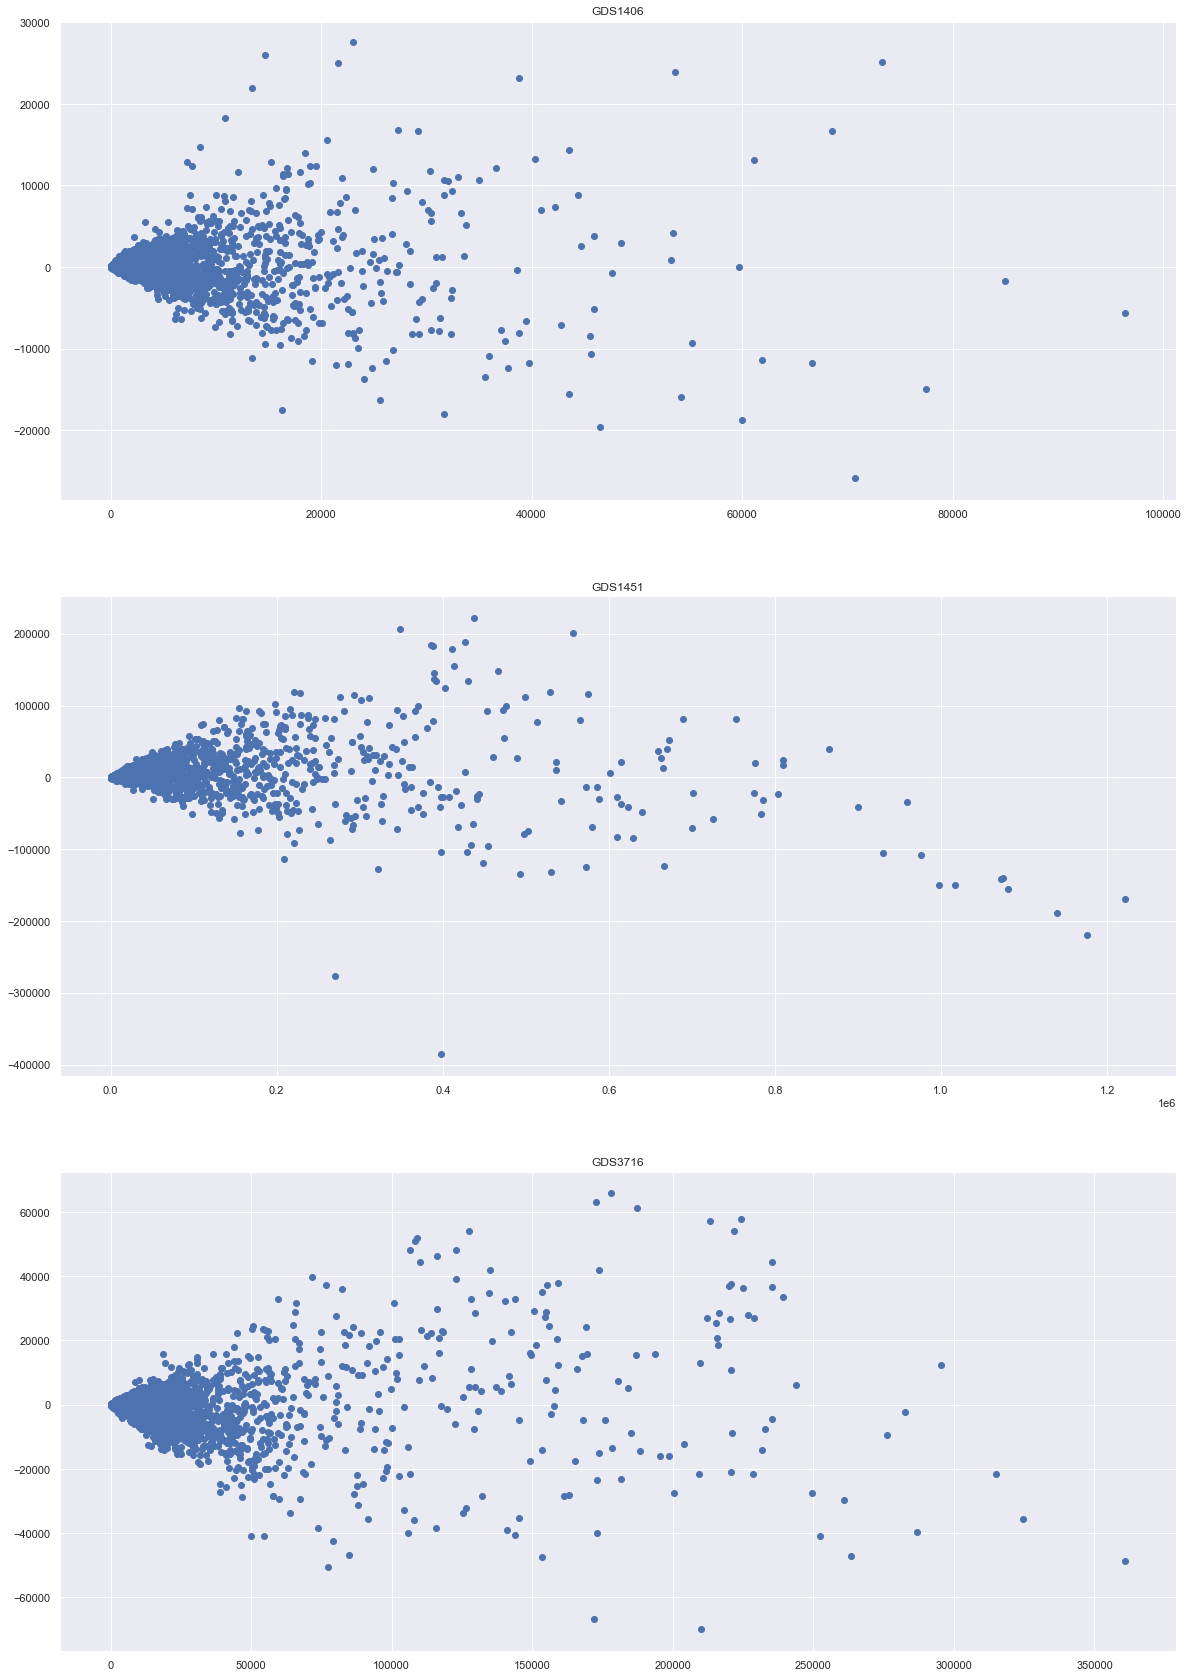

In [4]:
sns.set()

# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(len(datasets_list), 1,  figsize=(20, len(datasets_list)*10))

for current_element in range(len(datasets_list)):
  
    x = convert_to_tensor(np.reshape(datasets_list[current_element].loc[:, datasets_list[current_element].columns[2]:],
                                 (datasets_list[current_element].loc[:, datasets_list[current_element].columns[2]:].shape[0], -1)),
                                  dtype=dtypes.float32)
    
    eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
    
    x_pca = tensordot(x, eigenvectors, axes=1) 
    ax[current_element].scatter(x_pca[:, -1], x_pca[:, -2])
    ax[current_element].set_title(datasets_files[current_element])
    

In [5]:
datasets_list[0].head(50000)

,ID_REF,IDENTIFIER,GSM74912,GSM74913,GSM74914,GSM74927,GSM74928,GSM74941,GSM74942,GSM74955,...,GSM74952,GSM74953,GSM74965,GSM74966,GSM74980,GSM74981,GSM74995,GSM74996,GSM75007,GSM75008
0,100001_at,Cd3g,2.26,20.14,31.66,20.46,16.85,1.12,7.98,5.54,...,19.35,6.69,19.32,22.30,26.95,26.27,34.82,20.91,31.78,31.43
1,100002_at,Itih3,158.86,236.25,206.27,813.25,850.53,129.75,105.07,110.57,...,251.34,265.06,159.11,209.73,1661.55,1542.15,965.15,868.83,6.42,21.47
2,100003_at,Ryr1,68.11,105.45,82.92,17.08,12.70,94.79,68.63,75.91,...,58.98,41.89,33.54,45.08,12.06,26.57,9.41,26.14,9.55,12.57
3,100004_at,Ints7,74.32,96.68,84.87,81.40,88.16,141.82,68.80,94.18,...,108.20,84.86,99.89,75.86,79.37,86.60,103.54,83.41,117.85,119.81
4,100005_at,Traf4,75.05,53.17,57.94,124.74,127.09,39.83,67.50,140.75,...,57.67,49.12,119.38,162.75,128.03,127.57,115.91,130.21,62.70,129.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12483,AFFX-TrpnX-M_at,--Control,0.00,2.32,2.10,0.22,0.00,11.37,9.74,0.00,...,7.59,6.10,2.53,1.86,0.00,3.44,9.07,1.52,8.95,13.35
12484,AFFX-YEL002c/WBP1_at,--Control,10.17,4.27,15.31,5.99,6.11,3.40,10.61,10.22,...,1.53,0.68,3.80,9.58,0.00,4.16,0.24,14.77,7.13,14.33
12485,AFFX-YEL018w/_at,--Control,16.83,2.46,2.55,8.05,11.33,17.51,4.87,7.65,...,9.67,6.42,9.22,14.43,13.94,14.55,19.79,13.66,7.47,5.35
12486,AFFX-YEL021w/URA3_at,--Control,54.78,48.10,34.15,28.14,30.94,38.77,22.13,32.49,...,46.73,24.04,31.23,57.20,30.10,29.23,42.05,34.77,27.75,22.25


Удаление выбросов данных при помощи квантилей, нижняя граница `0.01`; верхняя граница `0.99`

In [6]:
quantile=[0.01,0.99]

for i in range(len(datasets_list)):
    for column in datasets_list[i].loc[:, datasets_list[i].columns[2]:]:
        Q01, Q99 = datasets_list[i][column].quantile(quantile).values.tolist()
        datasets_list[i] = datasets_list[i].loc[(datasets_list[i][column] < Q99)]
    
    df_original_values = datasets_list[i].loc[:, datasets_list[i].columns[2]:].values.tolist()
    flat_original_list = [item for sublist in df_original_values for item in sublist]
        
datasets_list[0].head(100000)

,ID_REF,IDENTIFIER,GSM74912,GSM74913,GSM74914,GSM74927,GSM74928,GSM74941,GSM74942,GSM74955,...,GSM74952,GSM74953,GSM74965,GSM74966,GSM74980,GSM74981,GSM74995,GSM74996,GSM75007,GSM75008
0,100001_at,Cd3g,2.26,20.14,31.66,20.46,16.85,1.12,7.98,5.54,...,19.35,6.69,19.32,22.30,26.95,26.27,34.82,20.91,31.78,31.43
13,100015_at,Yes1,43.82,52.27,67.61,33.65,64.47,60.79,39.85,54.59,...,44.54,33.93,30.48,41.45,74.63,66.50,39.62,47.87,59.00,53.48
14,100016_at,Mmp11,14.29,0.00,10.89,31.11,26.04,28.36,32.32,30.64,...,24.93,30.95,38.37,34.80,41.10,46.96,39.87,28.17,45.37,22.04
19,100021_at,Chrna1,36.26,17.11,18.59,11.07,4.93,23.44,10.29,13.25,...,11.98,15.27,24.74,18.80,5.04,6.22,9.89,13.86,10.27,0.00
21,100023_at,Mybl2,12.03,0.14,0.00,11.73,9.22,7.21,21.19,11.37,...,9.60,29.46,16.52,7.94,12.70,12.14,0.00,29.85,19.48,27.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12483,AFFX-TrpnX-M_at,--Control,0.00,2.32,2.10,0.22,0.00,11.37,9.74,0.00,...,7.59,6.10,2.53,1.86,0.00,3.44,9.07,1.52,8.95,13.35
12484,AFFX-YEL002c/WBP1_at,--Control,10.17,4.27,15.31,5.99,6.11,3.40,10.61,10.22,...,1.53,0.68,3.80,9.58,0.00,4.16,0.24,14.77,7.13,14.33
12485,AFFX-YEL018w/_at,--Control,16.83,2.46,2.55,8.05,11.33,17.51,4.87,7.65,...,9.67,6.42,9.22,14.43,13.94,14.55,19.79,13.66,7.47,5.35
12486,AFFX-YEL021w/URA3_at,--Control,54.78,48.10,34.15,28.14,30.94,38.77,22.13,32.49,...,46.73,24.04,31.23,57.20,30.10,29.23,42.05,34.77,27.75,22.25


Повторная визуализация для наблюдения результатов удаления выбросов.

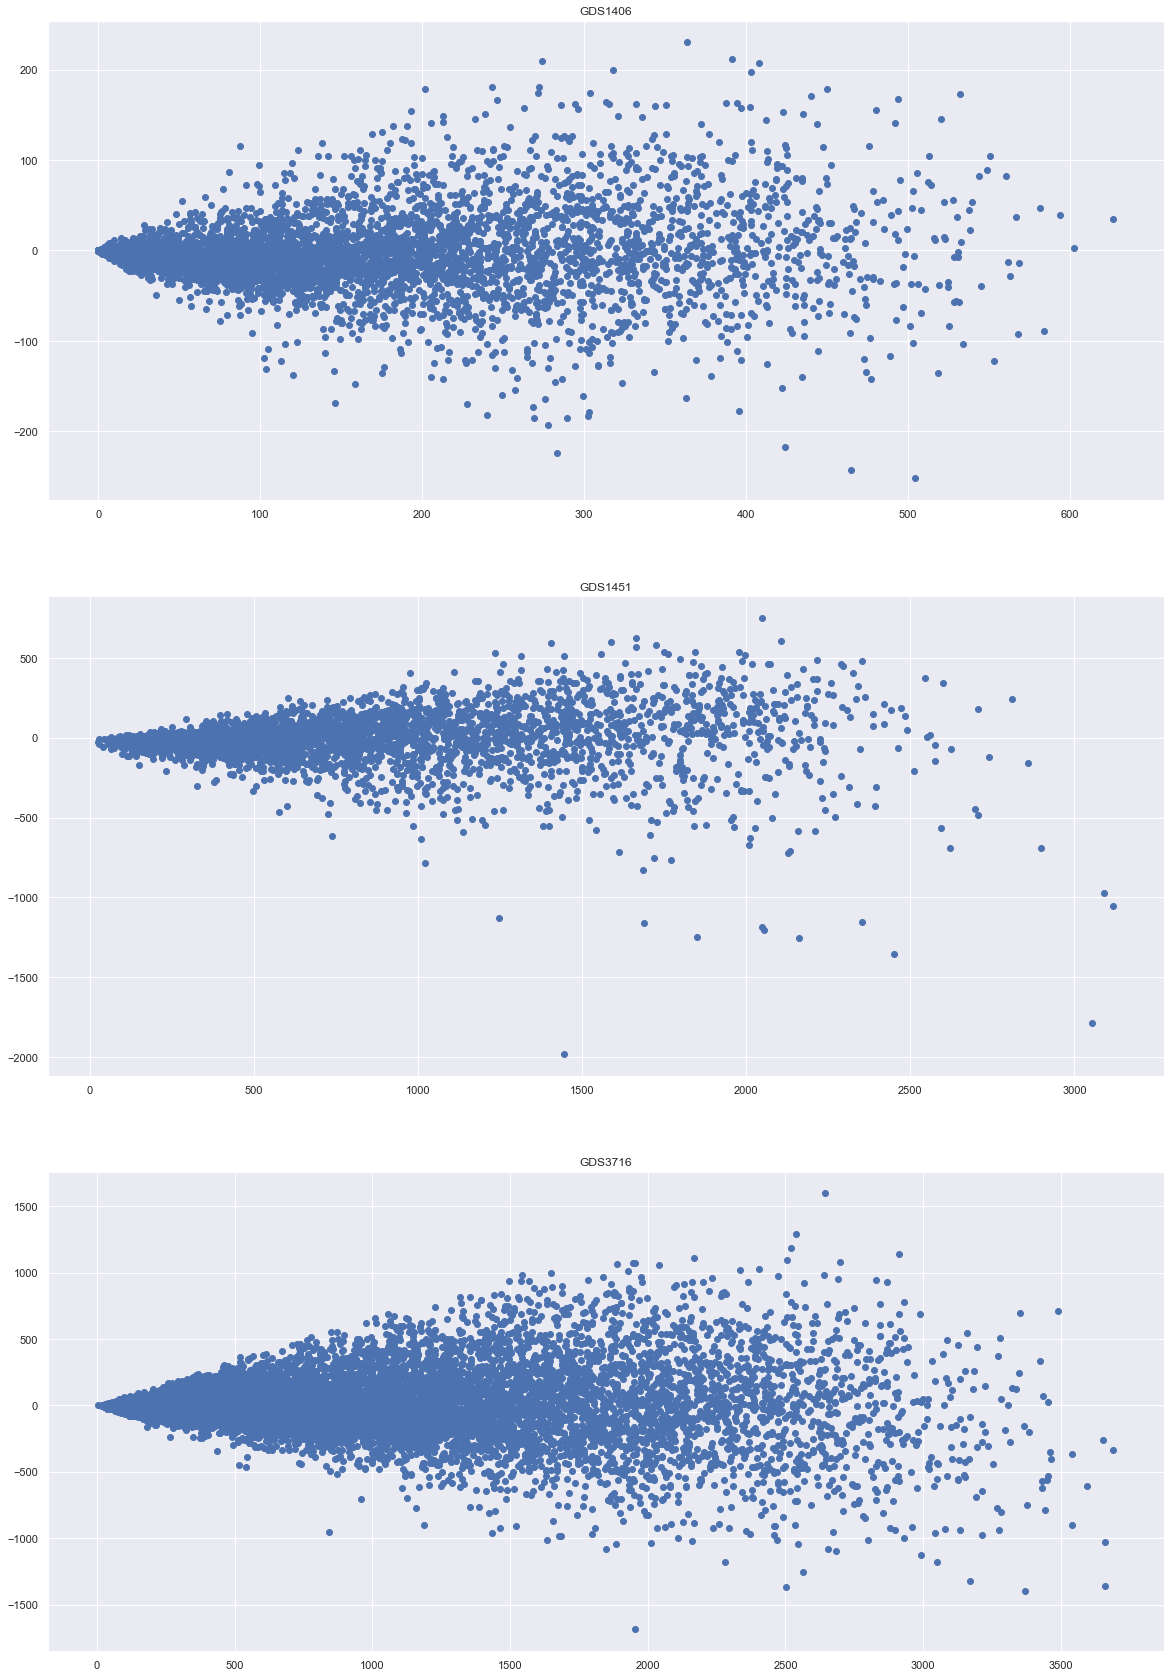

In [7]:
sns.set()

# Create two subplots and unpack the output array immediately
f, ax = plt.subplots(len(datasets_list), 1,  figsize=(20, len(datasets_list)*10))

for current_element in range(len(datasets_list)):
  
    x = convert_to_tensor(np.reshape(datasets_list[current_element].loc[:, datasets_list[current_element].columns[2]:],
                                 (datasets_list[current_element].loc[:, datasets_list[current_element].columns[2]:].shape[0], -1)),
                                  dtype=dtypes.float32)
    
    eigenvalues, eigenvectors = linalg.eigh(tensordot(transpose(x), x, axes=1))
    
    x_pca = tensordot(x, eigenvectors, axes=1) 
    ax[current_element].scatter(x_pca[:, -1], x_pca[:, -2])
    ax[current_element].set_title(datasets_files[current_element])

Сокращение данных до количества, которое сможет оптимизировать модель. 
Средние и максимальные значения датасетов.

In [8]:
max_datasets_values = []
mean_datasets_values = []

for i in range(len(datasets_list)):
    
    df_original_values = datasets_list[i].loc[:, datasets_list[i].columns[2]:].values.tolist()
    flat_original_list = [item for sublist in df_original_values for item in sublist]
    
    mean_datasets_values.append(np.mean(flat_original_list))
    max_datasets_values.append(max(flat_original_list))
    
    datasets_list[i] = datasets_list[i].loc[:200, :datasets_list[i].columns[20]]
    
    

In [9]:
print(mean_datasets_values)
print(max_datasets_values)

[17.741020642558507, 90.24110417251168, 126.1599770601038]
[312.83, 2118.2, 2872.1]


In [10]:
datasets_list[0].head(1000)

,ID_REF,IDENTIFIER,GSM74912,GSM74913,GSM74914,GSM74927,GSM74928,GSM74941,GSM74942,GSM74955,...,GSM74970,GSM74971,GSM74985,GSM74986,GSM74997,GSM74998,GSM74915,GSM74916,GSM74929,GSM74930
0,100001_at,Cd3g,2.26,20.14,31.66,20.46,16.85,1.12,7.98,5.54,...,24.99,18.99,14.05,25.84,20.67,13.83,14.58,16.04,24.33,23.70
13,100015_at,Yes1,43.82,52.27,67.61,33.65,64.47,60.79,39.85,54.59,...,82.35,57.63,23.91,37.41,40.59,44.93,36.00,29.78,43.60,18.29
14,100016_at,Mmp11,14.29,0.00,10.89,31.11,26.04,28.36,32.32,30.64,...,47.21,40.78,20.79,36.54,40.55,49.42,33.29,57.25,47.79,56.58
19,100021_at,Chrna1,36.26,17.11,18.59,11.07,4.93,23.44,10.29,13.25,...,9.64,9.37,3.59,19.08,16.36,10.12,13.95,21.63,14.68,11.59
21,100023_at,Mybl2,12.03,0.14,0.00,11.73,9.22,7.21,21.19,11.37,...,10.48,14.30,3.12,0.00,5.00,30.43,22.69,10.04,34.49,24.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100354_at,Tbx15,0.00,10.28,0.00,0.00,0.00,2.89,2.27,7.51,...,2.38,6.80,8.06,4.88,3.33,9.13,4.50,7.73,5.01,6.88
196,100355_g_at,Tbx15,16.55,32.37,30.80,3.09,8.52,16.44,7.40,21.10,...,3.01,8.19,6.88,0.00,0.00,2.52,17.81,22.62,12.27,27.52
197,100356_at,Gprasp1,5.08,11.52,0.00,7.75,5.96,11.26,4.58,0.52,...,2.60,1.02,3.33,7.40,23.41,6.41,0.00,22.13,0.00,8.94
199,100358_s_at,Tcp10b,31.12,10.24,15.24,27.23,25.93,7.51,20.77,29.66,...,28.04,37.93,23.84,24.77,42.94,26.18,22.02,37.26,51.56,42.64


Анализ данных по интервалам, для того чтобы примерно иметь представление о устанавливаемых порогах для преобразования.

In [11]:
values_list = []
values_original_list = []
for cur_df in datasets_list:
    
    copied_df = cur_df.copy(deep=True)
    for column in copied_df.loc[:, copied_df.columns[2]:]:
        copied_df.loc[(copied_df[column] < 0), column]  = -1
        copied_df.loc[(copied_df[column] > 0) & (copied_df[column] <= 1), column]  = 1
        copied_df.loc[(copied_df[column] > 1) & (copied_df[column] <= 10), column]  = 2
        copied_df.loc[(copied_df[column] > 10) & (copied_df[column] <= 100), column]  = 3
        copied_df.loc[(copied_df[column] > 100) & (copied_df[column] <= 200), column]  = 4
        copied_df.loc[(copied_df[column] > 200) & (copied_df[column] <= 300), column]  = 5 
        copied_df.loc[(copied_df[column] > 300) & (copied_df[column] <= 500), column]  = 6 
        copied_df.loc[(copied_df[column] > 500) & (copied_df[column] <= 1000), column]  = 7
        copied_df.loc[(copied_df[column] > 1000) & (copied_df[column] <= 2000), column]  = 8 
        copied_df.loc[(copied_df[column] > 2000) & (copied_df[column] <= 5000), column]  = 9
        copied_df.loc[(copied_df[column] > 5000) & (copied_df[column] <= 10000), column]  = 10
        copied_df.loc[(copied_df[column] > 10000), column]  = 11
        
    df_values = copied_df.loc[:, copied_df.columns[2]:].values.tolist()
    flat_list = [item for sublist in df_values for item in sublist]
    values_list += flat_list
    
    df_original_values = cur_df.loc[:, cur_df.columns[2]:].values.tolist()
    flat_original_list = [item for sublist in df_original_values for item in sublist]
    values_original_list += flat_original_list
    
len(values_list)

3610

In [12]:
X, Y = np.unique(values_list, return_counts=True)

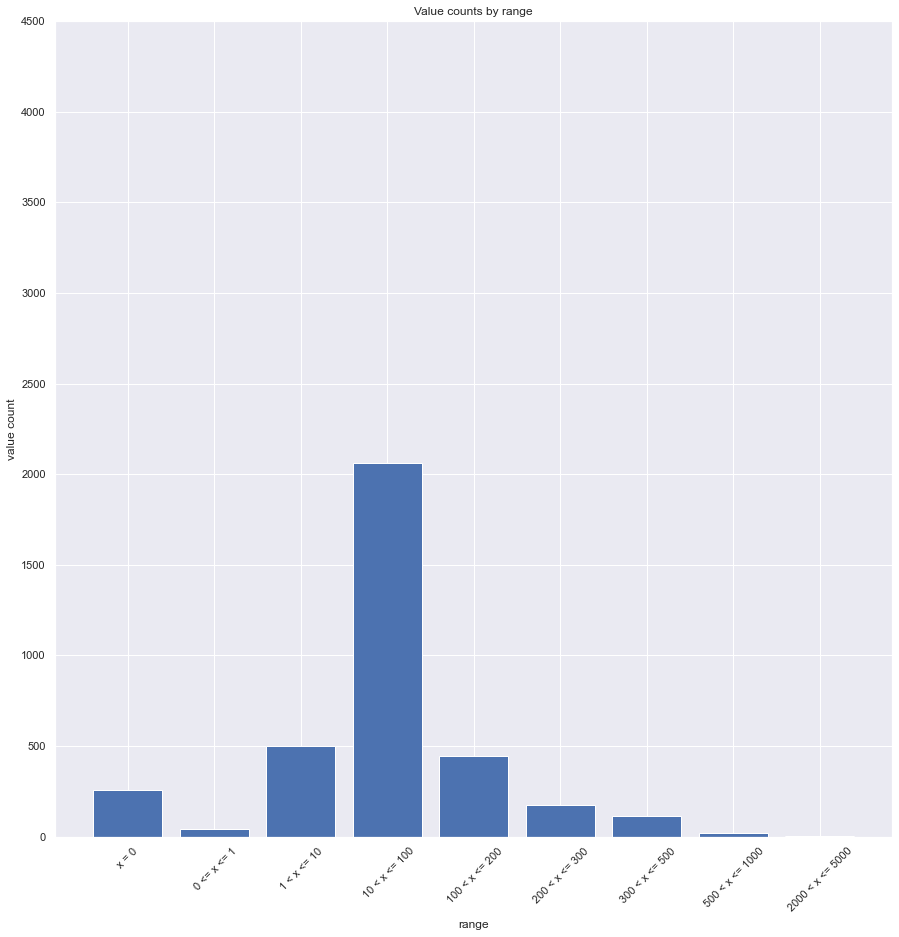

In [13]:
value_count_d = { -1 : "x < 0",
                 0 : "x = 0",
                 1 : " 0 <= x <= 1",
                 2 : " 1 < x <= 10",
                 3 : " 10 < x <= 100",
                 4 : " 100 < x <= 200",
                 5 : " 200 < x <= 300",
                 6 : " 300 < x <= 500",
                 7 : " 500 < x <= 1000",
                 8 : " 1000 < x <= 2000",
                 9 : " 2000 < x <= 5000",
                 10 : " 5000 < x <= 10000",
                 11 : " x > 10000"}


str_X = []
for i in range(len(X)):
    str_X.append(value_count_d[X[i]])

plt.rcParams["figure.figsize"] = (15, 15)
plt.bar( str_X, Y, color='b')
listOf_Yticks = np.arange(0, 5000, 500)
plt.yticks(listOf_Yticks)
plt.xticks(rotation=45)
plt.xlabel('range')
plt.ylabel('value count')
plt.title('Value counts by range')
plt.show()

In [14]:
mean_value = np.mean(values_original_list)
print("mean value of all datasets: ", mean_value)

max_value = max(values_original_list)
print("max value of all datasets: ", max_value)

mean value of all datasets:  67.95128972299169
max value of all datasets:  2872.1


In [15]:
datasets_list[0].head()

,ID_REF,IDENTIFIER,GSM74912,GSM74913,GSM74914,GSM74927,GSM74928,GSM74941,GSM74942,GSM74955,...,GSM74970,GSM74971,GSM74985,GSM74986,GSM74997,GSM74998,GSM74915,GSM74916,GSM74929,GSM74930
0,100001_at,Cd3g,2.26,20.14,31.66,20.46,16.85,1.12,7.98,5.54,...,24.99,18.99,14.05,25.84,20.67,13.83,14.58,16.04,24.33,23.70
13,100015_at,Yes1,43.82,52.27,67.61,33.65,64.47,60.79,39.85,54.59,...,82.35,57.63,23.91,37.41,40.59,44.93,36.00,29.78,43.60,18.29
14,100016_at,Mmp11,14.29,0.00,10.89,31.11,26.04,28.36,32.32,30.64,...,47.21,40.78,20.79,36.54,40.55,49.42,33.29,57.25,47.79,56.58
19,100021_at,Chrna1,36.26,17.11,18.59,11.07,4.93,23.44,10.29,13.25,...,9.64,9.37,3.59,19.08,16.36,10.12,13.95,21.63,14.68,11.59
21,100023_at,Mybl2,12.03,0.14,0.00,11.73,9.22,7.21,21.19,11.37,...,10.48,14.30,3.12,0.00,5.00,30.43,22.69,10.04,34.49,24.29


Функция записи данных в файл, в формате, принимаемом одновременно алгоритмом QUBIC и моделью.

In [16]:
def write_matrix_to_textfile(a_matrix, file_to_write):

    a_matrix = a_matrix.to_numpy()
    a_matrix = a_matrix.transpose()
    with open(file_to_write, 'w') as f:
        i = 0
        len_columns, len_rows = a_matrix.shape
        if len_rows > 0:
            
            str_to_write = ""
            str_to_write += "o"
            for j in range(len_rows):
                str_to_write += '\t' + 'G'+ str(j+1)
            f.write(str_to_write + '\n')
            for current_row in range(0,len(a_matrix)):
                i += 1
                f.write('C' + str(i))
                for col in range(len(a_matrix[current_row])):
                    f.write('\t' + str(int(a_matrix[current_row][col])))
                f.write('\n')

In [17]:
!mkdir .\discrete_dsets\

A subdirectory or file .\discrete_dsets\ already exists.


Установка трэшолдов, преобразование и запись полученных датасетов.

In [18]:
border_values = [10, 20, 30]

for i in range(len(datasets_list)):
   
    mean_value = mean_datasets_values[i]
    max_value = max_datasets_values[i]
    for current_border in border_values:
        copied_df = datasets_list[i].copy(deep=True)
        for column in copied_df.loc[:, copied_df.columns[2]:]:
            copied_df.loc[(copied_df[column] < mean_value * (1 + current_border/100)), column]  = 0
            copied_df.loc[(copied_df[column] >= mean_value * (1 + current_border/100)), column]  = 1
        write_matrix_to_textfile(copied_df.loc[:, copied_df.columns[2]:], "./discrete_dsets/" + datasets_files[i] + "more" + str(current_border))
        
    for current_border in border_values:
        copied_df = datasets_list[i].copy(deep=True)
        for column in copied_df.loc[:, copied_df.columns[2]:]:
            copied_df.loc[(copied_df[column] < mean_value * (1 - current_border/100)), column]  = 0
            copied_df.loc[(copied_df[column] >= mean_value * (1 - current_border/100)), column]  = 1
        write_matrix_to_textfile(copied_df.loc[:, copied_df.columns[2]:], "./discrete_dsets/" + datasets_files[i] + "less" + str(current_border))
        